In [1]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show



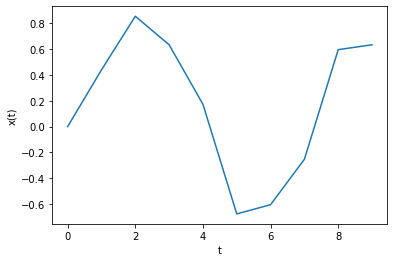

In [2]:
def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 10
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()


def rk4_fixed(f,x=0,tf,N):
    """
    
    RK4 Integrator for a fixed step size. 
    
    Start at t0 and go to tf, with N steps in between 
    
    """
    t0 = 0
    
    h = (tf - t0) /N
    
    xpoints = []
    tpoints = np.arange(a,b,h)
    for t in tpoints:
        xpoints.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6
        
    return x,tpoints

In [7]:
import numpy as np
def rk4_fixed(f,x=0,tf=10,N=100):
    """
    
    RK4 Integrator for a fixed step size. 
    
    Start at t0 and go to tf, with N steps in between 
    
    """
    t0 = 0
    
    h = (tf - t0) /N
    
    xpoints = []
    tpoints = np.arange(a,b,h)
    for t in tpoints:
        xpoints.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6
        
    return xpoints,tpoints



xpoints,tpoints = rk4_fixed(f,x=0,tf=10,N=100)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

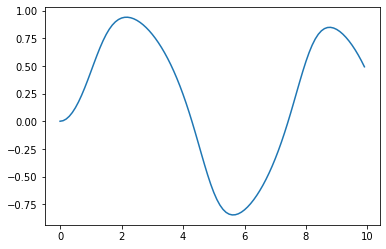

In [10]:
plt.plot(tpoints,xpoints)

Sick this works. Now apply it to a 2d orbit 

In [3]:
class rksolve:
	
	def __init__(self,f):
		
		self.f = f #self.array_decorator(f)
		
		self.initial_conditions = None
		self.solution = None
		
	def iterate(self,a,b,N=1000):
		
		#f = self.f
		r0 = array(self.initial_conditions,float96)
		
		h = (b-a)/N
		
		tpoints = arange(a,b,h)
		solution = empty(tpoints.shape + r0.shape,float)
		
		#r_points[0] = r0
		r = r0
		for i,t in enumerate(tpoints):
		    solution[i]=r
		    r += self.estimate_delta(r,t,h)
		
		self.h = h
		self.solution = solution
		self.t = tpoints
		
	def estimate_delta(self,r,t,h):
		
		f = self.f
		k1 = h*f(r,t)
		k2 = h*f(r+0.5*k1,t+0.5*h)
		k3 = h*f(r+0.5*k2,t+0.5*h)
		k4 = h*f(r+k3,t+h)
		return (k1+2*k2+2*k3+k4)/6
